In [2]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as P
from scipy import stats

import textwrap

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn import linear_model
from regress2 import regress2
import seaborn as sns

from sklearn import decomposition as decomp
from sklearn import preprocessing as prep
from sklearn import manifold as mfold

In [3]:
dst = '../hpcc/traditional/results/'
dst = '../../webpage/walnuts/figs/'

col_names = ['bname', 'wname',
             'nut_length','nut_height', 'nut_width',
             'nut_vol',
             'nut_va3d',
             'nut_ratio_feret',
             'nut_inv_ratio_feret',
             'nut_area',
             'nut_sphericity',
             'nut_cnvx_area',
             'nut_cnvx_vol',
             'nut_ratio_cnvx_area',
             'nut_ratio_cnvx_vol',
             'nut_inv_ratio_cnvx_area',
             'nut_inv_ratio_cnvx_vol',
             'krumbein',
             'corey',
             'sneed',
             'janke',
             'wadell',
             'air_vol', 'meat_vol', 'shell_vol', 'vein_vol',
             'air_ratio_vol', 'meat_ratio_vol', 'shell_ratio_vol', 'vein_ratio_vol',
             'shell_rugosity',
             'shell_thickness1','shell_thickness2','shell_thickness3','shell_thickness4',
             'shell_ext_ratio', 'shell_thick_ratio', 'shell_prot_ratio',
             'shell_ext_vol', 'shell_thick_vol', 'shell_prot_vol',
             'meat_length', 'meat_height', 'meat_width',
             'meat_area',
             'meat_cnvx_vol',
             'meat_cnvx_area',
             'meat_ratio_cnvx_area',
             'meat_inv_ratio_cnvx_area',
             'meat_ratio_cnvx_vol',
             'meat_inv_ratio_cnvx_vol']

col_labels =['Batch Name', 'Scan Name',
             'Nut Length','Nut Height', 'Nut Width',
             'Nut Volume',
             'Nut VA3D',
             'Nut Feret Ratio',
             'Nut Inverse Feret Ratio',
             'Nut Surface Area',
             'Nut Sphericity',
             'Nut Convex Surface Area',
             'Nut Convex Volume',
             'Nut Convex Area Ratio',
             'Nut Convex Volume Ratio',
             'Nut Convex Area Inverse Ratio',
             'Nut Convex Volume Inverse Ratio',
             'Krumbein Index',
             'Corey Index',
             'Sneed Index',
             'Janke Index',
             'Wadell Index',
             'Air Volume', 'Kernel Volume', 'Shell Volume', 'Packing Volume',
             'Air Volume Ratio', 'Kernel Volume Ratio', 'Shell Volume Ratio', 'Packing Volume Ratio',
             'Shell Rugosity',
             'Shell Thickness','Shell Thickness2','Shell Thickness3','Shell Thickness4',
             'External Shell Ratio', 'Bulge Shell Ratio', 'Protruding Shell Ratio',
             'External Shell Volume', 'Bulge Shell Volume', 'Protruding Shell Volume',
             'Kernel Length', 'Kernel Height', 'Kernel Width',
             'Kernel Surface Area',
             'Kernel Convex Volume',
             'Kernel Convex Surface Area',
             'Kernel Convex Area Ratio',
             'Kernel Convex Area Inverse Ratio',
             'Kernel Convex Volume Ratio',
             'Kernel Convex Volume Inverse Ratio']

col_units = ['', '',
             ' [mm]',' [mm]', ' [mm]',
             ' [mm$^3$]',
             '',
             '',
             '',
             ' [mm$^2$]',
             '',
             ' [mm$^2$]',
             ' [mm$^3$]',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]',
             '', '', '', '',
             '',
             ' [mm]',' [mm]',' [mm]',' [mm]',
             '', '', '',
             ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]',
             ' [mm]', ' [mm]', ' [mm]',
             ' [mm$^2$]',
             ' [mm$^3$]',
             ' [mm$^2$]',
             '',
             '',
             '',
             '']

filename = '../hpcc/traditional/traditional_phenotypes.csv'
data = pd.read_csv(filename, header=None, dtype={1:str}, names=col_names)
data.loc[data['bname'] == '201SBa_R5_T55', 'bname'] = '2014SBa_R5_T55'
print(data.shape)
data.head()

(1301, 51)


bname wname  nut_length  nut_height  nut_width       nut_vol  \
0  2008SB_R4_T13   001   41.750477   33.582913  31.395051  20387.149371   
1  2008SB_R4_T13   002   39.720443   33.450554  31.454860  20512.900734   
2  2008SB_R4_T13   003   42.790987   35.768852  33.257804  24394.576769   
3  2008SB_R4_T13   004   39.589858   34.400643  31.931823  21020.676969   
4  2008SB_R4_T13   005   38.284326   34.049830  31.365337  19995.849647   

   nut_va3d  nut_ratio_feret  nut_inv_ratio_feret     nut_area  ...  \
0  4.941865         1.329843             0.751969  6147.314265  ...   
1  4.643222         1.262776             0.791906  6045.635968  ...   
2  4.596968         1.286645             0.777215  6763.478980  ...   
3  4.496373         1.239825             0.806566  6079.521052  ...   
4  4.335537         1.220594             0.819274  5809.316020  ...   

   meat_length  meat_height  meat_width    meat_area  meat_cnvx_vol  \
0    31.762844    28.371963   20.810690  6130.273789   10658.298930   
1    32.788899    27.734060   23.007246  6179.125457   11415.246424   
2    34.354962    29.135261   23.114041  6770.011739   13023.165953   
3    32.636524    28.850349   23.129211  6603.916065   11822.113691   
4    30.290693    27.548723   23.052005  6213.425320   10610.224955   

   meat_cnvx_area  meat_ratio_cnvx_area  meat_inv_ratio_cnvx_area  \
0     2473.436202              0.403479                  2.478444   
1     2572.442636              0.416312                  2.402046   
2     2828.536677              0.417804                  2.393468   
3     2618.373004              0.396488                  2.522145   
4     2446.843283              0.393799                  2.539364   

   meat_ratio_cnvx_vol  meat_inv_ratio_cnvx_vol  
0             1.783503                 0.560694  
1             1.774842                 0.563430  
2             1.799651                 0.555663  
3             1.708197                 0.585413  
4             1.742377                 0.573929  

[5 rows x 51 columns]

In [4]:
filename = '../all_phenos_for_Erik_221024.csv'
attr = pd.read_csv(filename)
print(attr.shape)

(720, 20)


In [5]:
cattraits = np.zeros((len(data), 15)) - 1
UCACCSD = []

for i in range(len(cattraits)):
    locate, Rrow, Ttree = data.iloc[i,0].split('_')
    row = int(Rrow[1:])
    tree = int(Ttree[1:])
    
    if locate == 'NewStuke':
        locate = 'New Stuke'
    #elif locate in ['SelectC','SelectD','SelectF']:
    elif locate in ['SelectD']:
        locate = 'Select Davis'

    metadf = attr[(attr['LOCATE']==locate) & (attr['ROW']==row) & (attr['TREE']==tree)]
    if len(metadf) > 0:
        meta = metadf.iloc[0]
        cattraits[i] = meta.iloc[5:].values.astype(float)
        UCACCSD.append(metadf.iloc[0,0])
    else:
        #print(data.iloc[i,0])
        UCACCSD.append('')
        pass

foo = pd.DataFrame(cattraits, columns=attr.columns[5:])

In [6]:
uc = pd.DataFrame(UCACCSD, columns=['UCACCSD'])

In [7]:
df = pd.concat([uc, data, foo], axis=1)
print(df.shape)
df.head()

(1301, 67)


UCACCSD          bname wname  nut_length  nut_height  nut_width  \
0  06-005-27  2008SB_R4_T13   001   41.750477   33.582913  31.395051   
1  06-005-27  2008SB_R4_T13   002   39.720443   33.450554  31.454860   
2  06-005-27  2008SB_R4_T13   003   42.790987   35.768852  33.257804   
3  06-005-27  2008SB_R4_T13   004   39.589858   34.400643  31.931823   
4  06-005-27  2008SB_R4_T13   005   38.284326   34.049830  31.365337   

        nut_vol  nut_va3d  nut_ratio_feret  nut_inv_ratio_feret  ...  \
0  20387.149371  4.941865         1.329843             0.751969  ...   
1  20512.900734  4.643222         1.262776             0.791906  ...   
2  24394.576769  4.596968         1.286645             0.777215  ...   
3  21020.676969  4.496373         1.239825             0.806566  ...   
4  19995.849647  4.335537         1.220594             0.819274  ...   

   ShellThickness  PackingTissue  KernelFill  %TipShrivel  %MinorShrivel  \
0             1.5            6.0         5.0          0.0            0.0   
1             1.5            6.0         5.0          0.0            0.0   
2             1.5            6.0         5.0          0.0            0.0   
3             1.5            6.0         5.0          0.0            0.0   
4             1.5            6.0         5.0          0.0            0.0   

   %MajorShrivel  Plumpness  EaseOfRemoval  PercentKernel  %Blank  
0            0.0        4.0            6.0      48.389312     0.0  
1            0.0        4.0            6.0      48.389312     0.0  
2            0.0        4.0            6.0      48.389312     0.0  
3            0.0        4.0            6.0      48.389312     0.0  
4            0.0        4.0            6.0      48.389312     0.0  

[5 rows x 67 columns]

In [8]:
j = 27
kratio = data.iloc[:,j].values
q25,q50,q75 = np.quantile(kratio, [0.25,.5,0.75])
print(q25,q50,q75, sep='\t')
iqr = q75 - q25
floor = q25-2*iqr
print(floor)
nonemptyk = np.where(kratio > floor)[0]

df = df.iloc[nonemptyk, :]
print(df.shape)

0.3074069767799232	0.3428250919670407	0.3714665882052332
0.17928775392930313
(1264, 67)


In [9]:
scol_labels = np.asarray(col_labels, dtype=str)
filename = '../hpcc/traditional/traditional_phenotypes_merged.csv'
df = pd.read_csv(filename, dtype={1:str})
print(df.shape)
df.head()

(1264, 66)


bname wname  nut_length  nut_height  nut_width       nut_vol  \
0  2008SB_R4_T13   001   41.750477   33.582913  31.395051  20387.149371   
1  2008SB_R4_T13   002   39.720443   33.450554  31.454860  20512.900734   
2  2008SB_R4_T13   003   42.790987   35.768852  33.257804  24394.576769   
3  2008SB_R4_T13   004   39.589858   34.400643  31.931823  21020.676969   
4  2008SB_R4_T13   005   38.284326   34.049830  31.365337  19995.849647   

   nut_va3d  nut_ratio_feret  nut_inv_ratio_feret     nut_area  ...  \
0  4.941865         1.329843             0.751969  6147.314265  ...   
1  4.643222         1.262776             0.791906  6045.635968  ...   
2  4.596968         1.286645             0.777215  6763.478980  ...   
3  4.496373         1.239825             0.806566  6079.521052  ...   
4  4.335537         1.220594             0.819274  5809.316020  ...   

   ShellThickness  PackingTissue  KernelFill  %TipShrivel  %MinorShrivel  \
0             1.5            6.0         5.0          0.0            0.0   
1             1.5            6.0         5.0          0.0            0.0   
2             1.5            6.0         5.0          0.0            0.0   
3             1.5            6.0         5.0          0.0            0.0   
4             1.5            6.0         5.0          0.0            0.0   

   %MajorShrivel  Plumpness  EaseOfRemoval  PercentKernel  %Blank  
0            0.0        4.0            6.0      48.389312     0.0  
1            0.0        4.0            6.0      48.389312     0.0  
2            0.0        4.0            6.0      48.389312     0.0  
3            0.0        4.0            6.0      48.389312     0.0  
4            0.0        4.0            6.0      48.389312     0.0  

[5 rows x 66 columns]

In [10]:
for i in range(2,len(col_labels)):
    print(i,col_labels[i],sep='\t')

2	Nut Length
3	Nut Height
4	Nut Width
5	Nut Volume
6	Nut VA3D
7	Nut Feret Ratio
8	Nut Inverse Feret Ratio
9	Nut Surface Area
10	Nut Sphericity
11	Nut Convex Surface Area
12	Nut Convex Volume
13	Nut Convex Area Ratio
14	Nut Convex Volume Ratio
15	Nut Convex Area Inverse Ratio
16	Nut Convex Volume Inverse Ratio
17	Krumbein Index
18	Corey Index
19	Sneed Index
20	Janke Index
21	Wadell Index
22	Air Volume
23	Kernel Volume
24	Shell Volume
25	Packing Volume
26	Air Volume Ratio
27	Kernel Volume Ratio
28	Shell Volume Ratio
29	Packing Volume Ratio
30	Shell Rugosity
31	Shell Thickness
32	Shell Thickness2
33	Shell Thickness3
34	Shell Thickness4
35	External Shell Ratio
36	Bulge Shell Ratio
37	Protruding Shell Ratio
38	External Shell Volume
39	Bulge Shell Volume
40	Protruding Shell Volume
41	Kernel Length
42	Kernel Height
43	Kernel Width
44	Kernel Surface Area
45	Kernel Convex Volume
46	Kernel Convex Surface Area
47	Kernel Convex Area Ratio
48	Kernel Convex Area Inverse Ratio
49	Kernel Convex Volume

In [11]:
mmtraits = list(range(2,7)) + [8,9] + [17,18,19] + list(range(22,30)) + [31] + list(range(35,48))
mmtraits = np.asarray(mmtraits)

../../webpage/walnuts/figs/nut_volume_allometry


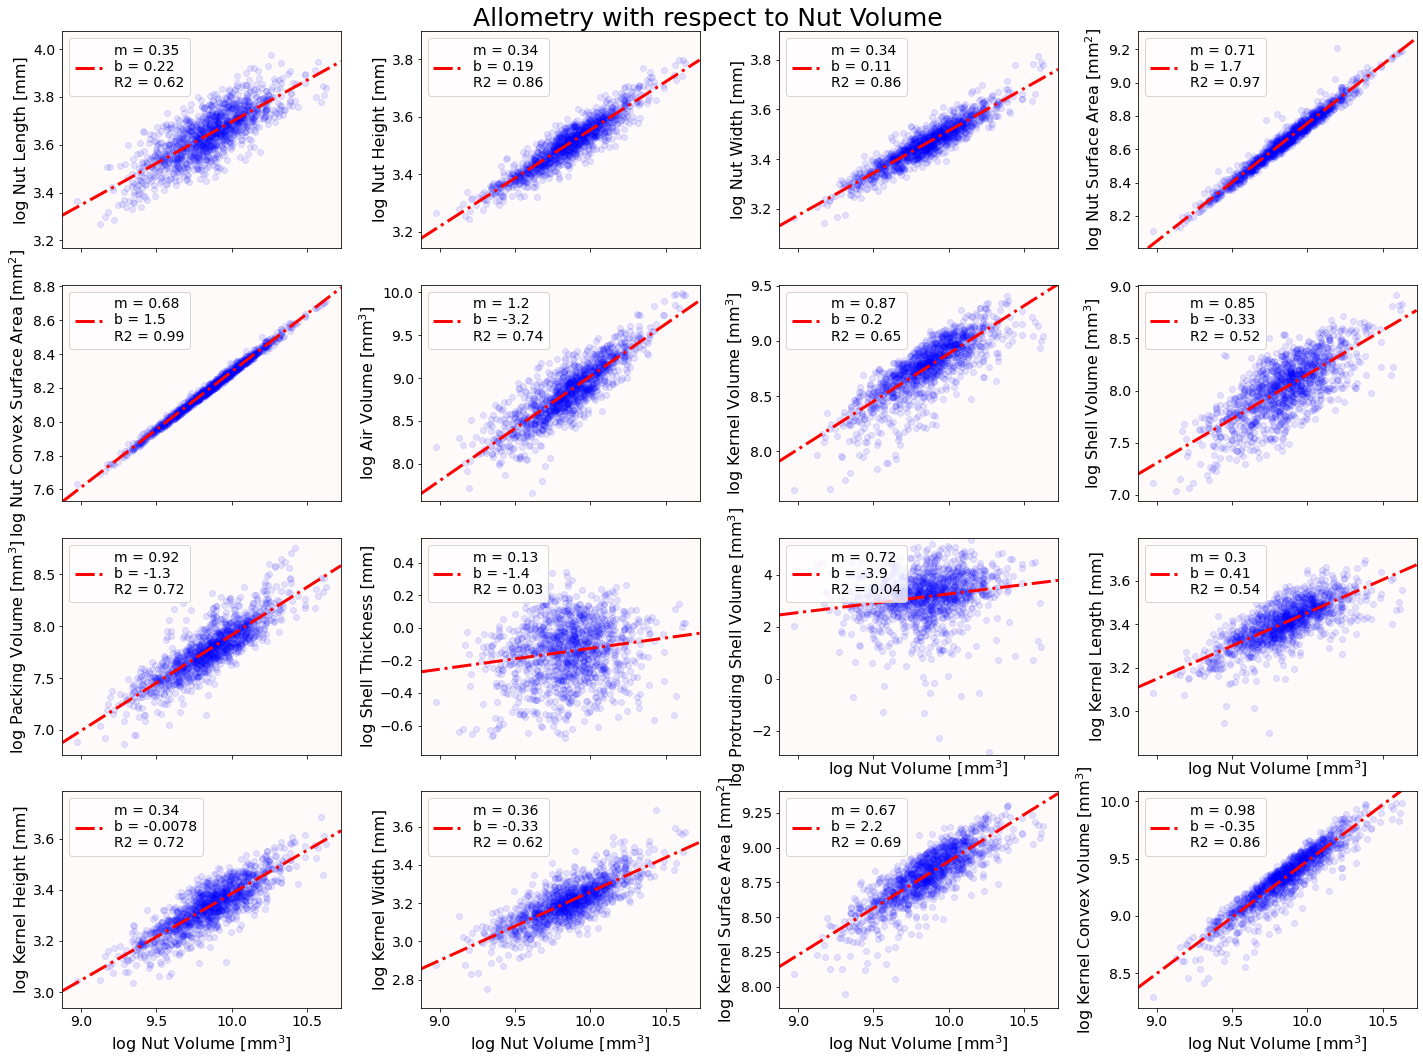

In [18]:
fs = 14
fig, ax = plt.subplots(4,4, figsize=(20,15), sharex=True)
ax = np.atleast_1d(ax).ravel()

i = 5
TRAIT_I = np.log(df.iloc[:,i].values)

for idx,j in enumerate([2,3,4,9,11,22,23,24,25,31,40,41,42,43,44,45]):
    nonzero = np.nonzero(df.iloc[:,j].values)[0]
    if len(nonzero) == len(df):
        trait_i = TRAIT_I.copy()
        trait_j = np.log(df.iloc[:,j].values)
    else:
        trait_i = np.log(df.iloc[nonzero,i].values)
        trait_j = np.log(df.iloc[nonzero,j].values)
        
    r,p = stats.pearsonr(trait_i, trait_j)

    ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
    ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)

    new_series = P.Polynomial.fit(trait_i,trait_j, deg=1, full=False)
    foo = new_series.convert().coef
    r2 = r2_score(trait_j, new_series(trait_i))
    axlabel = 'm = {:.2}\nb = {:.2}\nR2 = {}'.format(foo[1], foo[0], np.round(r2,2))
    bar = ax[idx].axline(xy1=(0,foo[0]), slope=foo[1], color='r', label=axlabel, ls='-.', lw=3)

    ax[idx].scatter(trait_i, trait_j, color='b', alpha=0.1)
    ax[idx].set_ylabel('log ' + col_labels[j] + col_units[j], fontsize=fs+2);
    ax[idx].legend(loc='upper left', fontsize=fs)

for idx in range(10,len(ax)):
    ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);

fig.suptitle('Allometry with respect to Nut Volume', fontsize=25)
fig.tight_layout()
filename = dst + col_labels[i].lower().replace(' ','_') + '_allometry'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

../../webpage/walnuts/figs/individual_tissue_allometry


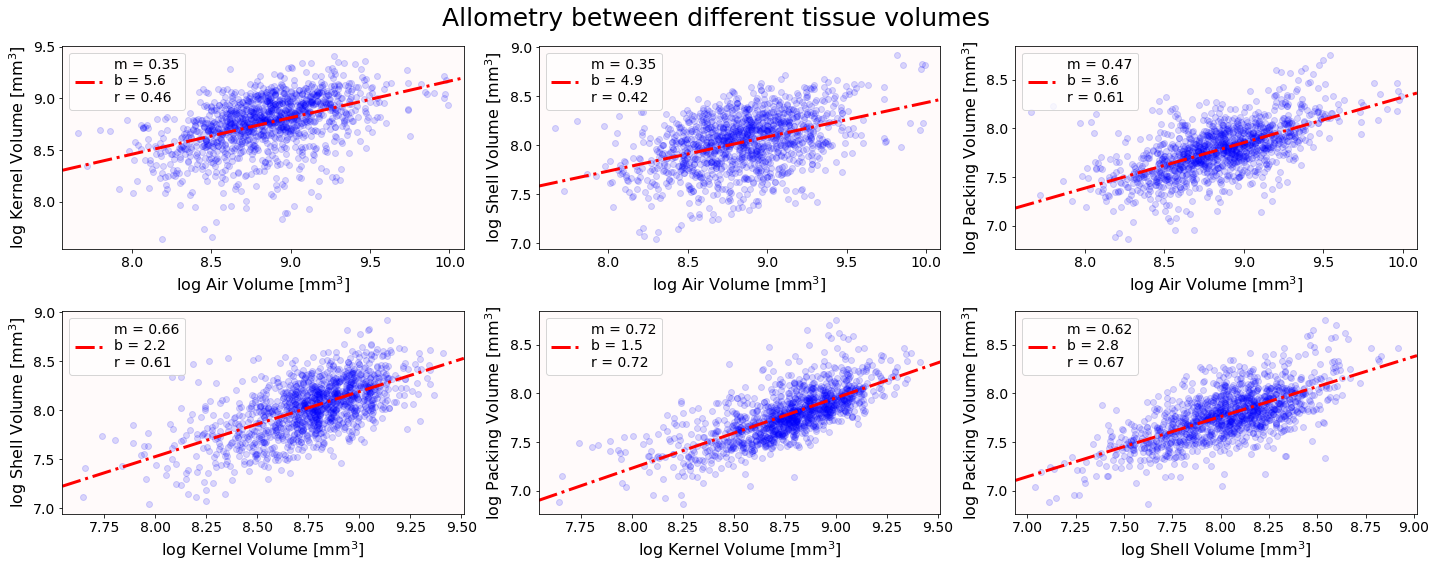

In [14]:
fs = 14
fig, ax = plt.subplots(2,3, figsize=(20,8))
ax = np.atleast_1d(ax).ravel()

idx = 0
for i in range(22,26):
    trait_i = np.log(df.iloc[:,i].values)
    for j in range(i+1, 26):
        trait_j = np.log(df.iloc[:,j].values)
        r,p = stats.pearsonr(trait_i, trait_j)

        ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
        ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
        ax[idx].set_facecolor('snow')
        ax[idx].tick_params(labelsize=fs)

        new_series = P.Polynomial.fit(trait_i,trait_j, deg=1, full=False)
        foo = new_series.convert().coef
        r2 = r2_score(trait_j, new_series(trait_i))
        axlabel = 'm = {:.2}\nb = {:.2}\nr = {:.2}'.format(foo[1], foo[0], r)
        bar = ax[idx].axline(xy1=(0,foo[0]), slope=foo[1], color='r', label=axlabel, ls='-.', lw=3)

        ax[idx].scatter(trait_i, trait_j, color='b', alpha=0.15)
        ax[idx].set_ylabel('log ' + col_labels[j] + col_units[j], fontsize=fs+2);
        ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);
        ax[idx].legend(loc='upper left', fontsize=fs)
        idx += 1

#for idx in range(10,len(ax)):
#    ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);

fig.suptitle('Allometry between different tissue volumes', fontsize=25)
fig.tight_layout()
filename = dst + 'individual_tissue_allometry'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

In [20]:
len([49,47,26,22,23,9,44,13,14])

9

../../webpage/walnuts/figs/kernel_percentage_relationship


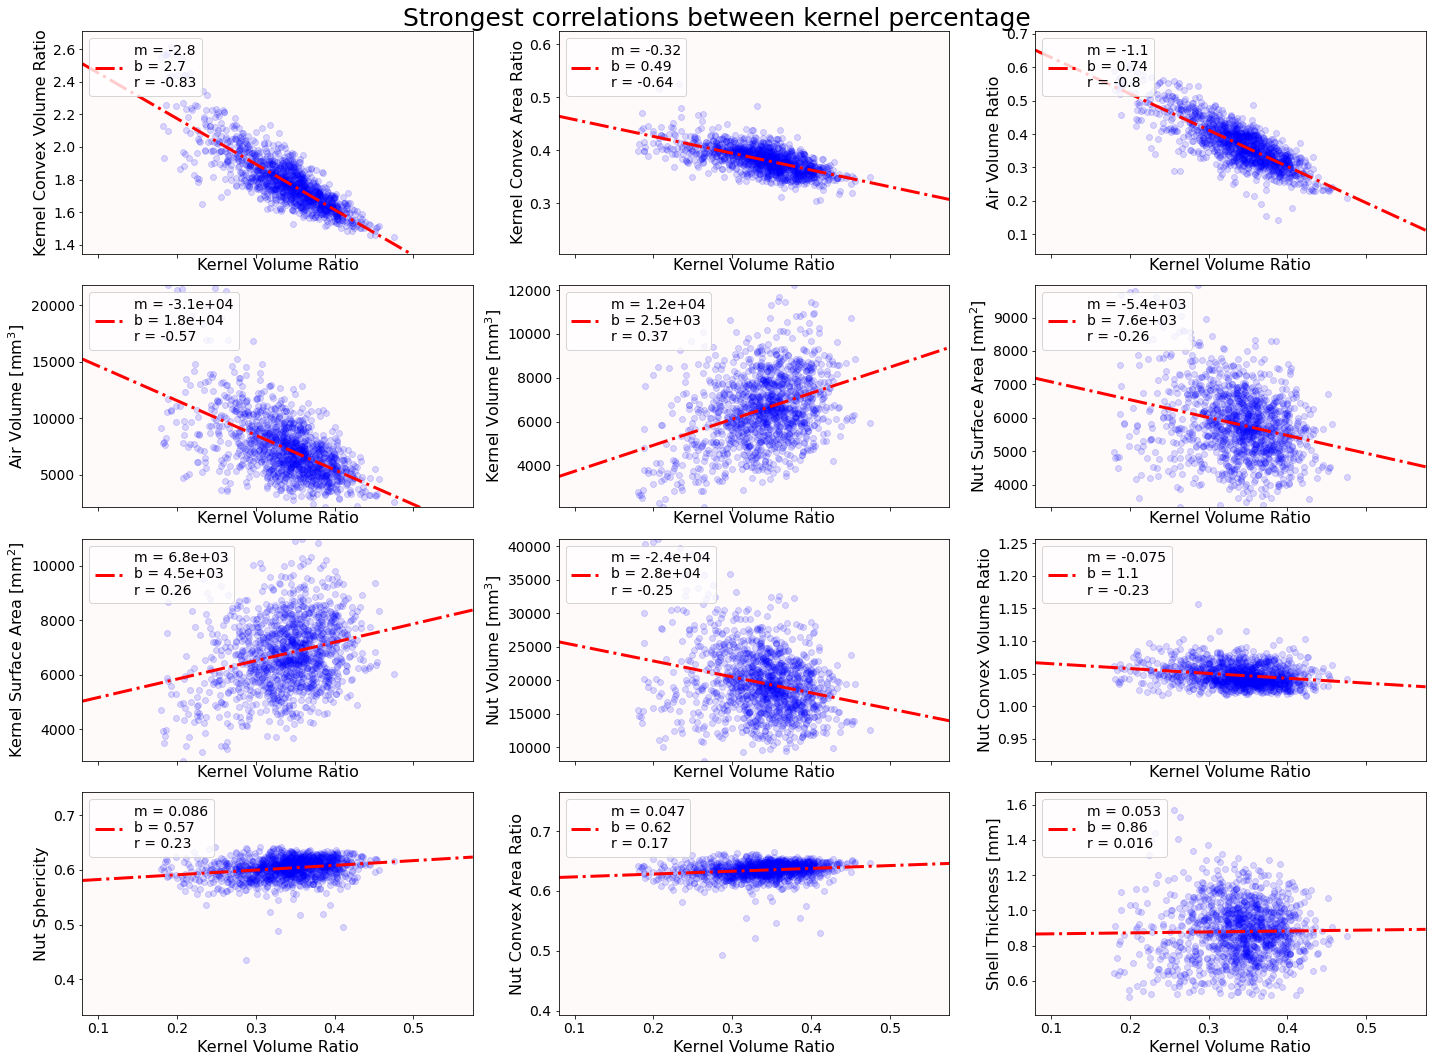

In [35]:
fs = 14
fig, ax = plt.subplots(4,3, figsize=(20,15), sharex=True)
ax = np.atleast_1d(ax).ravel()

idx = 0
i = 27
trait_i = (df.iloc[:,i].values)
for j in [49,47,26,22,23,9,44,5,14, 10,13,31]:
    trait_j = (df.iloc[:,j].values)
    r,p = stats.pearsonr(trait_i, trait_j)

    ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
    ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)

    new_series = P.Polynomial.fit(trait_i,trait_j, deg=1, full=False)
    foo = new_series.convert().coef
    r2 = r2_score(trait_j, new_series(trait_i))
    axlabel = 'm = {:.2}\nb = {:.2}\nr = {:.2}'.format(foo[1], foo[0], r)
    bar = ax[idx].axline(xy1=(0,foo[0]), slope=foo[1], color='r', label=axlabel, ls='-.', lw=3)

    ax[idx].scatter(trait_i, trait_j, color='b', alpha=0.15)
    ax[idx].set_ylabel(col_labels[j] + col_units[j], fontsize=fs+2);
    ax[idx].set_xlabel(col_labels[i] + col_units[i], fontsize=fs+2);
    ax[idx].legend(loc='upper left', fontsize=fs)
    idx += 1

#for idx in range(10,len(ax)):
#    ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);

fig.suptitle('Strongest correlations between kernel percentage', fontsize=25)
fig.tight_layout()
filename = dst + 'kernel_percentage_relationship'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

../../webpage/walnuts/figs/individual_tissue_volume_relationship


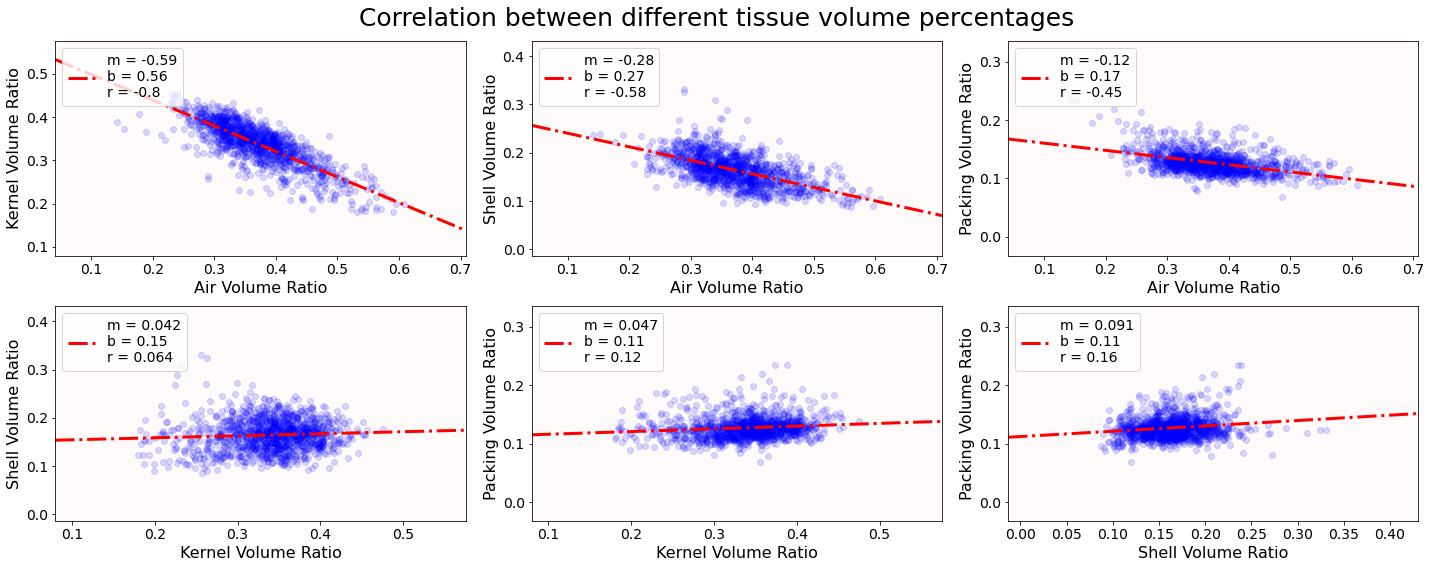

In [16]:
fs = 14
fig, ax = plt.subplots(2,3, figsize=(20,8))
ax = np.atleast_1d(ax).ravel()

idx = 0
for i in range(26,30):
    trait_i = (df.iloc[:,i].values)
    for j in range(i+1, 30):
        trait_j = (df.iloc[:,j].values)
        r,p = stats.pearsonr(trait_i, trait_j)

        ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
        ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
        ax[idx].set_facecolor('snow')
        ax[idx].tick_params(labelsize=fs)

        new_series = P.Polynomial.fit(trait_i,trait_j, deg=1, full=False)
        foo = new_series.convert().coef
        r2 = r2_score(trait_j, new_series(trait_i))
        axlabel = 'm = {:.2}\nb = {:.2}\nr = {:.2}'.format(foo[1], foo[0], r)
        bar = ax[idx].axline(xy1=(0,foo[0]), slope=foo[1], color='r', label=axlabel, ls='-.', lw=3)

        ax[idx].scatter(trait_i, trait_j, color='b', alpha=0.15)
        ax[idx].set_ylabel(col_labels[j] + col_units[j], fontsize=fs+2);
        ax[idx].set_xlabel(col_labels[i] + col_units[i], fontsize=fs+2);
        ax[idx].legend(loc='upper left', fontsize=fs)
        idx += 1

#for idx in range(10,len(ax)):
#    ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);

fig.suptitle('Correlation between different tissue volume percentages', fontsize=25)
fig.tight_layout()
filename = dst + 'individual_tissue_volume_relationship'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

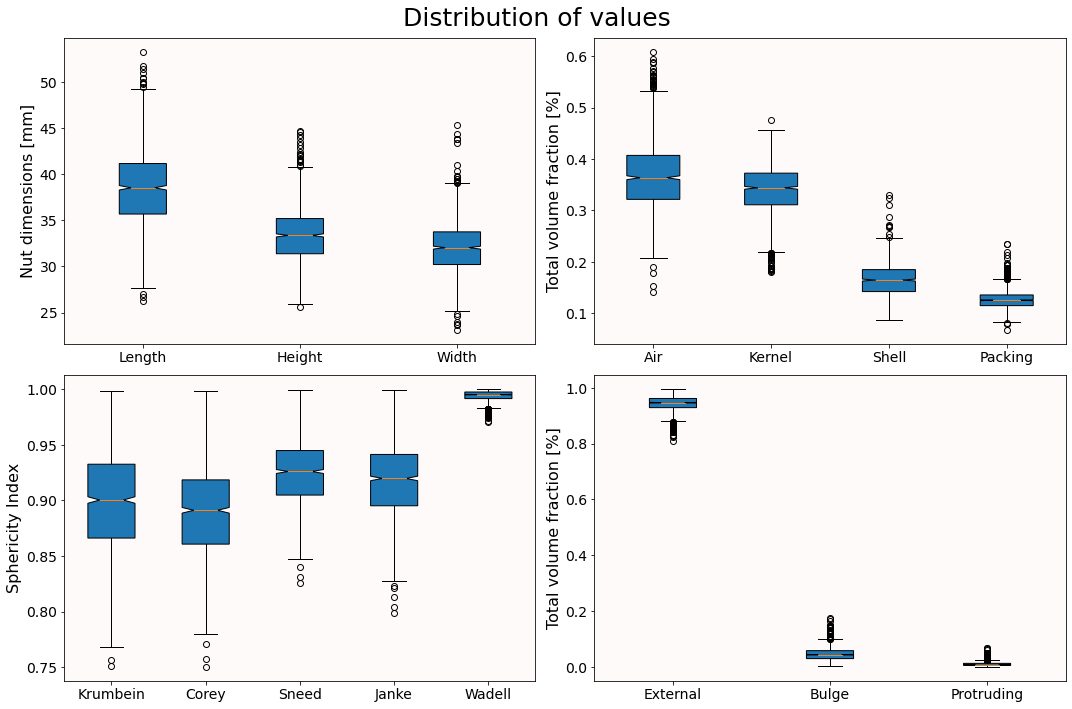

In [40]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = np.atleast_1d(ax).ravel()

idx=0
ss=np.s_[2:5]; labels = [(s.split(' ')[1]) for s in col_labels[ss]]
ax[idx].boxplot(df.iloc[:,ss].values, notch=True, vert=True, patch_artist=True, labels=labels);
ax[idx].set_ylabel('Nut dimensions [mm]', fontsize=fs+2)
idx+=1; 

ss=np.s_[26:30]; labels = [(s.split(' ')[0]) for s in col_labels[ss]]
ax[idx].boxplot(df.iloc[:,ss].values, notch=True, vert=True, patch_artist=True, labels=labels);
ax[idx].set_ylabel('Total volume fraction [%]', fontsize=fs+2)
idx+=1; 

ss=np.s_[17:22]; labels = [(s.split(' ')[0]) for s in col_labels[ss]]
ax[idx].boxplot(df.iloc[:,ss].values, vert=True, notch=True, patch_artist=True, labels=labels);
ax[idx].set_ylabel('Sphericity Index', fontsize=fs+2)
idx+=1; 

ss=np.s_[35:38]; labels = [(s.split(' ')[0]) for s in col_labels[ss]]
ax[idx].boxplot(df.iloc[:,ss].values, notch=True, vert=True, patch_artist=True, labels=labels);
ax[idx].set_ylabel('Total volume fraction [%]', fontsize=fs+2)
idx+=1; 

for idx in range(len(ax)):
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    
fig.suptitle('Distribution of values', fontsize=25)
fig.tight_layout()

filename = dst + 'nutdim_volratio_sphericty_box_plots'
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

# Correlation

In [41]:
pcamask = list(range(2,51))
#pcamask = list(range(2,6)) + [7] + list(range(9,15)) + list(range(17,30)) + [31] + list(range(35,48)) + [49]

feats = df.iloc[:,pcamask].values.copy()
scaler = prep.StandardScaler().fit(feats)
imgfeats = scaler.transform(feats)
print(imgfeats.shape)

(1264, 49)


In [53]:
pcorrstat = np.ones((feats.shape[1], feats.shape[1]))
ppvalcorr = np.zeros_like(pcorrstat)

scorrstat = np.ones((feats.shape[1], feats.shape[1]))
spvalcorr = np.zeros_like(pcorrstat)

for i in range(len(pcorrstat)-1):
    for j in range(i+1, len(pcorrstat)):
        pstat, ppval = stats.pearsonr(feats[:,i], feats[:,j])
        sstat, spval = stats.spearmanr(feats[:,i], feats[:,j])
        
        pcorrstat[i,j] = pstat
        pcorrstat[j,i] = pstat
        ppvalcorr[i,j] = ppval
        ppvalcorr[j,i] = ppval
        
        scorrstat[i,j] = sstat
        scorrstat[j,i] = sstat
        spvalcorr[i,j] = spval
        spvalcorr[j,i] = spval

In [54]:
bonferroni = 0.05/49
bonferroni

0.0010204081632653062

In [59]:
i = 27
print(col_labels[i], '\n--------')
i -= 2
argsort = np.argsort(np.abs(pcorrstat[i]))[::-1]
corrlabs = np.asarray(col_labels)[argsort+2]

for j in range(1,len(argsort)):
    print(j, corrlabs[j], np.round(pcorrstat[i,argsort[j]],3), -np.round(np.log10(ppvalcorr[i,argsort[j]]),2), sep='\t')

Kernel Volume Ratio 
--------
1	Kernel Convex Volume Inverse Ratio	0.841	inf
2	Kernel Convex Volume Ratio	-0.833	inf
3	Air Volume Ratio	-0.803	285.6
4	Kernel Convex Area Ratio	-0.638	144.73
5	Kernel Convex Area Inverse Ratio	0.636	143.74
6	Air Volume	-0.575	111.22
7	Kernel Volume	0.368	41.18
8	Nut Surface Area	-0.261	20.43
9	Kernel Surface Area	0.261	20.41
10	Nut Convex Volume	-0.256	19.71
11	Nut Convex Surface Area	-0.25	18.8
12	Nut Volume	-0.247	18.24
13	Nut Convex Volume Inverse Ratio	0.227	15.5
14	Nut Convex Volume Ratio	-0.226	15.41
15	Nut Sphericity	0.225	15.25
16	Shell Rugosity	-0.217	14.23
17	Nut Height	-0.216	14.05
18	Nut VA3D	-0.204	12.63
19	Nut Width	-0.195	11.57
20	Nut Length	-0.175	9.41
21	Nut Convex Area Ratio	0.169	8.84
22	Nut Convex Area Inverse Ratio	-0.16	8.0
23	Packing Volume	-0.159	7.91
24	Shell Volume	-0.159	7.88
25	Bulge Shell Volume	-0.154	7.4
26	External Shell Volume	-0.152	7.23
27	Kernel Length	0.145	6.64
28	Packing Volume Ratio	0.124	5.02
29	Sneed Index	0.076	

In [63]:
pd.Series(df['meat_ratio_cnvx_vol']).describe()

count    1264.000000
mean        1.786475
std         0.165834
min         1.444302
25%         1.674423
50%         1.763159
75%         1.868367
max         2.611655
Name: meat_ratio_cnvx_vol, dtype: float64

In [42]:
i = 13
i -= 2
argsort = np.argsort(np.abs(scorrstat[i]))[::-1]
corrlabs = np.asarray(col_labels)[argsort+2]

for j in range(1,len(argsort)):
    print(j, corrlabs[j], np.round(scorrstat[i,argsort[j]],3), -np.round(np.log10(spvalcorr[i,argsort[j]]),2), sep='\t')

NameError: name 'scorrstat' is not defined

In [43]:
pcorr = data.iloc[:,mmtraits].corr(method='pearson')
scorr = data.iloc[:,mmtraits].corr(method='spearman')

../../webpage/walnuts/figs/spearman_correlation_ext


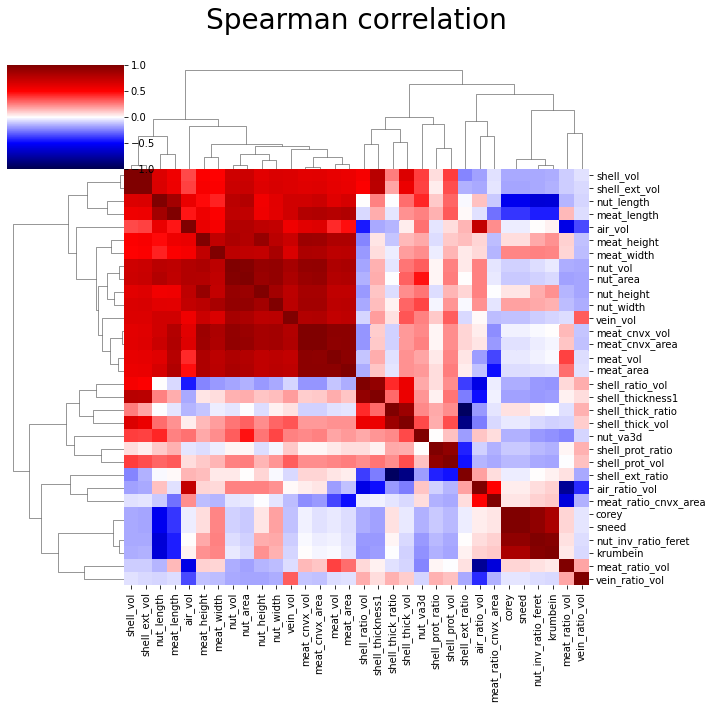

In [44]:
vmin, vmax = -1,1
cmap = 'seismic'

sns.clustermap(scorr, method='complete', vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Spearman correlation', fontsize=28);

filename = dst + 'spearman_correlation_ext'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

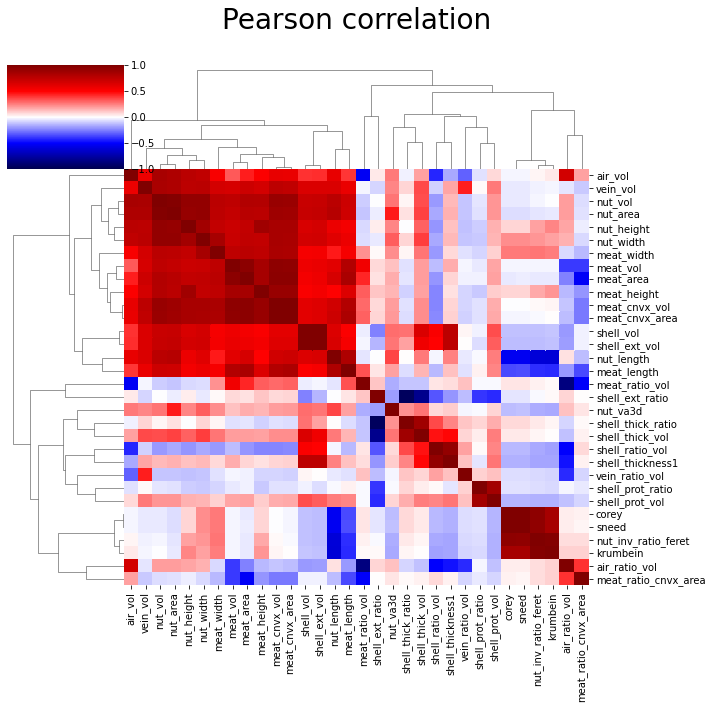

In [45]:
sns.clustermap(pcorr, method='complete', vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Pearson correlation', fontsize=28);

filename = dst + 'pearson_correlation_ext'
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# Linear models

In [27]:
# mmtraits = [2,3,4,5,6,8,9,17,18,19,22,23,24,25,26,27,28,29,31,32,33,34,35]
# mmtraits = np.asarray(mmtraits)
mmtraits = np.arange(2, 51)

ols_m = np.zeros((len(mmtraits), len(mmtraits)))
ols_b = ols_m.copy()
ols_r = ols_m.copy()
ols_p = ols_m.copy()
ols_R2 = ols_m.copy()

for i in range(len(ols_m)):
    for j in range(len(ols_m)):
        nonzero_i = set(np.nonzero(data.iloc[:,mmtraits[i]].values)[0])
        nonzero_j = set(np.nonzero(data.iloc[:,mmtraits[j]].values)[0])
        
        nonzero = np.asarray(list(nonzero_i & nonzero_j))
        
        trait_i = np.log(data.iloc[nonzero,mmtraits[i]].values)
        trait_j = np.log(data.iloc[nonzero,mmtraits[j]].values)
    
        ols = stats.linregress(trait_i, trait_j)
        
        ols_R2[i,j] = r2_score(trait_j, ols.slope*trait_i + ols.intercept)
        ols_m[i, j] = ols.slope
        ols_b[i, j] = ols.intercept
        ols_p[i, j] = ols.pvalue
        ols_r[i, j] = ols.rvalue

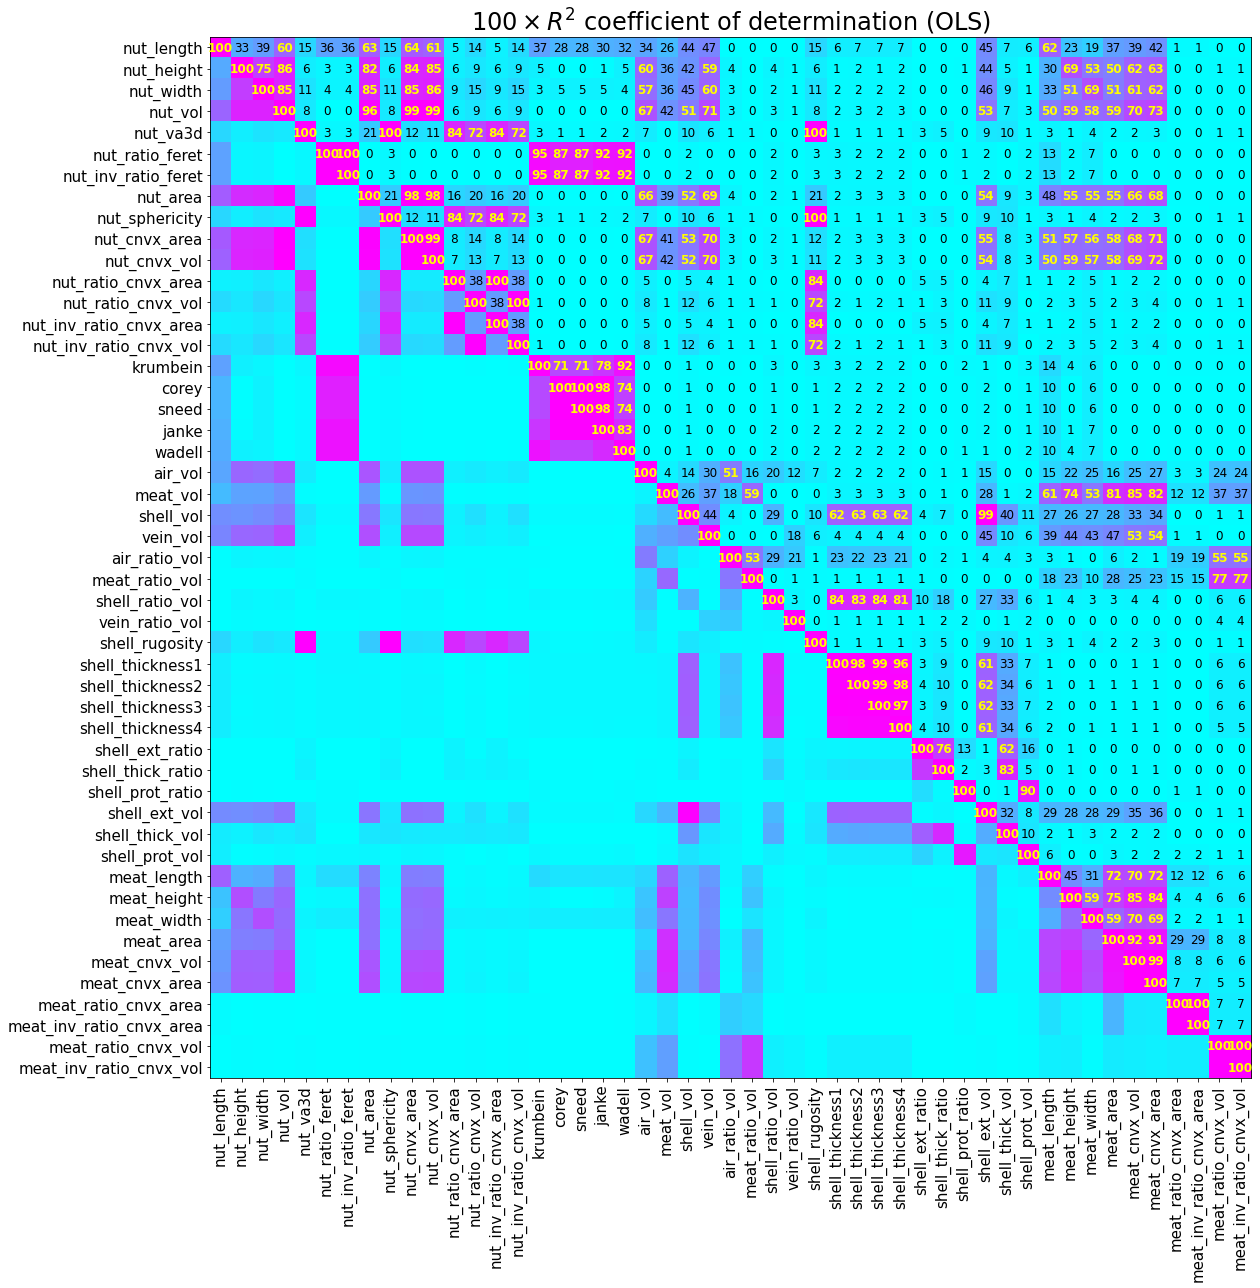

In [28]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(ols_R2, cmap='cool', vmin=0, vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(ols_r)))
ax.set_yticks(np.arange(len(ols_r)))
# ... and label them with the respective list entries
ax.set_xticklabels(data.columns[mmtraits])
ax.set_yticklabels(data.columns[mmtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(len(ols_r)):
    for j in range(i,len(ols_r) ):
        if ols_R2[i,j] > 0.5:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(j, i, '{:d}'.format(int(100*ols_R2[i, j])),
                       ha="center", va="center", color=tcolor, fontsize=12, fontweight=fw)

ax.set_title("$100 \\times R^2$ coefficient of determination (OLS)", fontsize=24)
fig.tight_layout()

filename = dst + 'OLS_R2_ext'
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

In [29]:
signif = np.asarray(np.nonzero((ols_R2 < 0.97) & (ols_R2 > 0.75)))
signif = signif[:,signif[0] < signif[1]]
#signif = signif[:,::2]
print(signif.shape)
for i in range(signif.shape[1]):
    print(i,np.round(ols_R2[signif[0,i],signif[1,i]], 2),col_labels[signif[0,i]+2],'--',col_labels[signif[1,i] + 2], sep='\t')

(2, 47)
0	0.76	Nut Height	--	Nut Width
1	0.86	Nut Height	--	Nut Volume
2	0.83	Nut Height	--	Nut Surface Area
3	0.84	Nut Height	--	Nut Convex Surface Area
4	0.86	Nut Height	--	Nut Convex Volume
5	0.86	Nut Width	--	Nut Volume
6	0.85	Nut Width	--	Nut Surface Area
7	0.86	Nut Width	--	Nut Convex Surface Area
8	0.87	Nut Width	--	Nut Convex Volume
9	0.97	Nut Volume	--	Nut Surface Area
10	0.85	Nut VA3D	--	Nut Convex Area Ratio
11	0.85	Nut VA3D	--	Nut Convex Area Inverse Ratio
12	0.96	Nut Feret Ratio	--	Krumbein Index
13	0.88	Nut Feret Ratio	--	Corey Index
14	0.88	Nut Feret Ratio	--	Sneed Index
15	0.93	Nut Feret Ratio	--	Janke Index
16	0.93	Nut Feret Ratio	--	Wadell Index
17	0.96	Nut Inverse Feret Ratio	--	Krumbein Index
18	0.88	Nut Inverse Feret Ratio	--	Corey Index
19	0.88	Nut Inverse Feret Ratio	--	Sneed Index
20	0.93	Nut Inverse Feret Ratio	--	Janke Index
21	0.93	Nut Inverse Feret Ratio	--	Wadell Index
22	0.85	Nut Sphericity	--	Nut Convex Area Ratio
23	0.85	Nut Sphericity	--	Nut Convex Area

# Link to categorical traits from Pat Brown

In [46]:
fs = 15
marker = ['o', 'v','*','^', 's', '<', 'X', '>', 'p', '8', 'h', 'H', 'D', 'd', 'P']
#col_wong = ['#e69f00', '#009e73', '#0072b2', '#d55e00', '#cc79a7', '#f0e442', '#56b4e9']
col_wong = ['#d81b60', '#1e88e5', '#ffc107', '#004d40', '#56e495']
col_wong += col_wong


cattraitnames = ['EaseOfRemoval',
                 'ShellStrength',
                 'ShellTexture',
                 'ShellIntegrity',
                 'ShellColor',
                 'SEAL',
                 'PackingTissue',
                 'KernelFill',
                 'Plumpness']

In [47]:
feats.shape

(1264, 49)

In [53]:
cattraitname = cattraitnames[0]
cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
cattrait = cattrait.astype(int)
#for i in range(feats.shape[1]):

i = 1
kruskal = []
for k in range(len(cattrait)):
    mask = df[cattraitname] == cattrait[k]
    kruskal.append(feats[mask,i])

In [29]:
for cattraitname in cattraitnames:
#    cattraitname = cattraitnames[-1]

    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)

    fig, ax = plt.subplots(16,3, figsize=(18,45), sharex=False)
    ax = np.atleast_1d(ax).ravel()
    #traitidx = [5,9,13,14,26,27,28,29,31,37,40,41]
    traitidx = list(range(2,51))
    traitidx = traitidx[:len(ax)]

    for idx,i in enumerate(traitidx):
        trait_i = df.iloc[:,i].values
        boxplot = []
        for k in range(len(cattrait)):
            mask = df[cattraitname] == cattrait[k]
            ax[idx].scatter(np.random.default_rng().uniform(-1,1,np.sum(mask))*.33 + k,
                            trait_i[mask],
                            color=col_wong[k], marker=marker[k], s=60, alpha=0.25)
            boxplot.append(trait_i[mask])
        ax[idx].boxplot(boxplot, notch=False, sym='', vert=True, positions=range(len(cattrait)), widths=0.7,
                        medianprops = {'color':col_wong[-2], 'lw':4})
        ax[idx].set_ylabel(col_labels[i], fontsize=fs)
        ax[idx].set_xticks(range(len(cattrait)))
        ax[idx].set_xticklabels(cattrait)
        ax[idx].tick_params(labelsize=12)


    fig.suptitle(cattraitname, fontsize=24)
    fig.tight_layout()

    filename = dst + 'squal_' + cattraitname + '_scatter'
    plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
    plt.close()

# PCA

In [48]:
pcamask = list(range(2,51))
#pcamask = list(range(2,6)) + [7] + list(range(9,15)) + list(range(17,30)) + [31] + list(range(35,48)) + [49]

imgfeats = df.iloc[:,pcamask].values.copy()
scaler = prep.StandardScaler().fit(imgfeats)
imgfeats = scaler.transform(imgfeats)
print(imgfeats.shape)

(1264, 49)


In [49]:
pca = decomp.PCA(n_components=2, svd_solver='full')
pca.fit(imgfeats)

print(100*pca.explained_variance_ratio_[:10])
print(pca.singular_values_[:10])
print(100*np.cumsum(pca.explained_variance_ratio_)[:10])

redux = pca.transform(imgfeats)
print(redux.shape)

[32.4513097  16.73128764]
[141.77109429 101.79730012]
[32.4513097  49.18259734]
(1264, 2)


../../webpage/walnuts/figs/PCA_trait_scatter


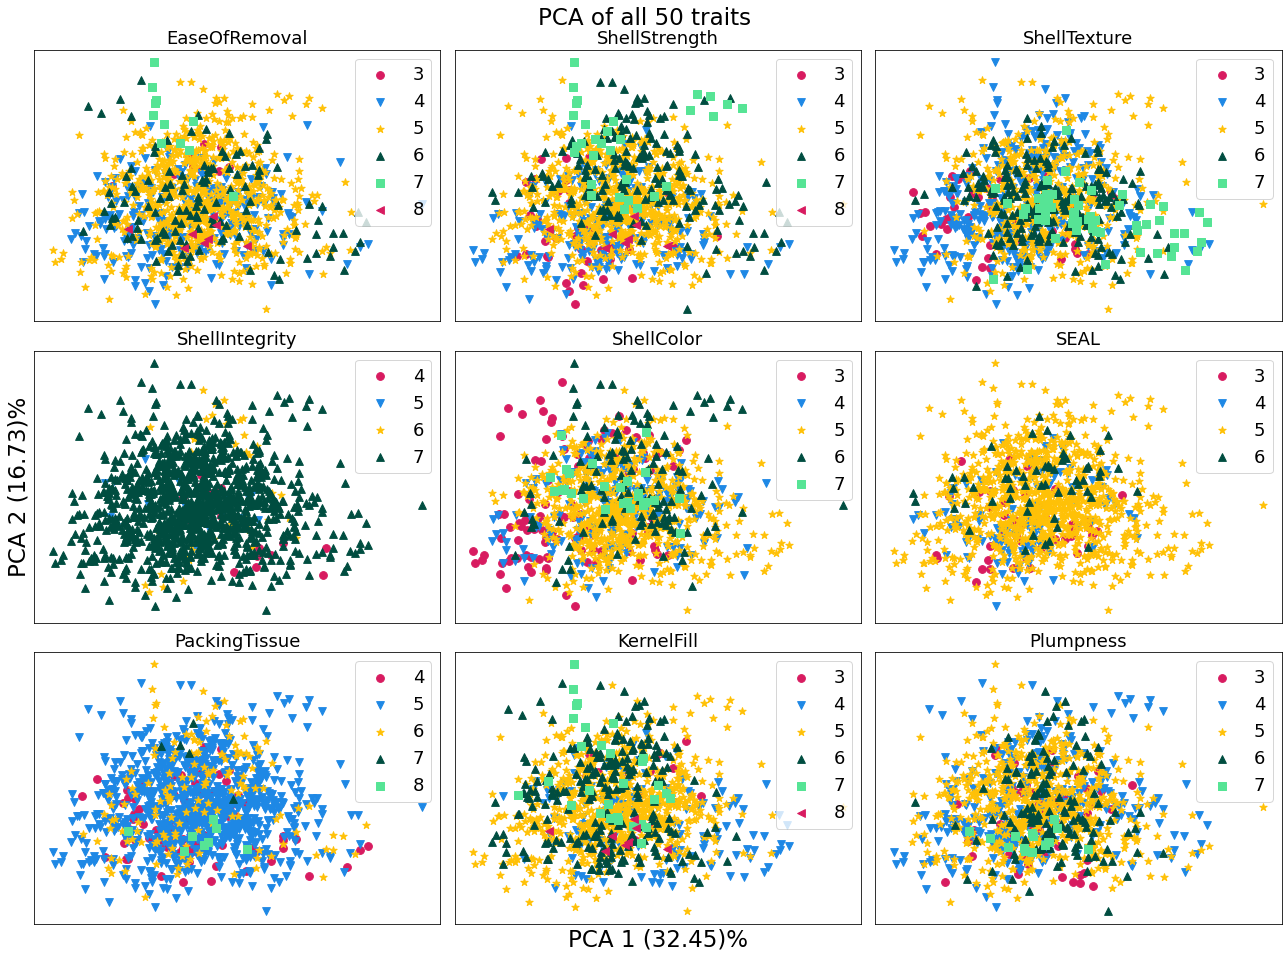

In [76]:
fs = 18
fig, ax = plt.subplots(3,3, figsize=(18,13.5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(redux[mask,0],
                        redux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);
    
for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

ax[7].set_xlabel('PCA 1 ({:.2f})%'.format(pca.explained_variance_ratio_[0]*100), fontsize=fs+5)
ax[3].set_ylabel('PCA 2 ({:.2f})%'.format(pca.explained_variance_ratio_[1]*100), fontsize=fs+5);

fig.suptitle('PCA of all 50 traits', fontsize = fs+5)
fig.tight_layout();

filename = dst + 'PCA_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

In [78]:
r = np.sqrt(np.max(pca.components_[0]**2 + pca.components_[1]**2))
an = np.linspace(0, 2 * np.pi, 100)

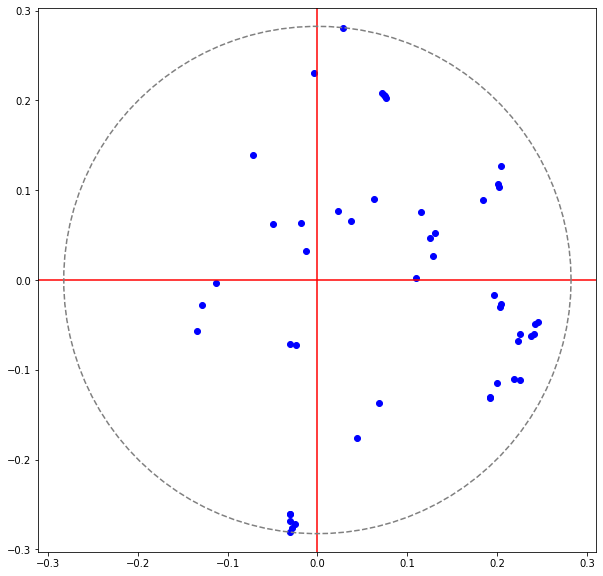

In [79]:
fig, ax = plt.subplots(1,1, figsize=(10,10), sharex=True, sharey=False)
ax = np.atleast_1d(ax).ravel()

idx = 0
ax[idx].axvline(0, c='r')
ax[idx].axhline(0, c='r')
ax[idx].plot(r*np.cos(an), r*np.sin(an), ls='--', c='gray')
ax[idx].scatter(pca.components_[0], pca.components_[1], c='b');
ax[idx].axis('equal');

In [80]:
foo = np.sqrt(pca.components_[0]**2 + pca.components_[1]**2)
sortarr = np.argsort(foo)[::-1]
sort_labels = np.asarray(col_labels)[sortarr]
for i in range(10):
    print(i+1, np.round(foo[sortarr[i]],2), sort_labels[i], sep='\t')

1	0.28	Nut Volume
2	0.28	Nut VA3D
3	0.28	Nut Convex Area Inverse Ratio
4	0.27	Sneed Index
5	0.27	Corey Index
6	0.26	Krumbein Index
7	0.26	Nut Convex Volume Inverse Ratio
8	0.25	Nut Length
9	0.25	Nut Feret Ratio
10	0.25	Nut Sphericity


In [103]:
sortarr = np.argsort(np.abs(pca.components_[idx]))[::-1]
plus = np.where(pca.components_[idx][sortarr] > 0)[0]
minus = np.where(pca.components_[idx][sortarr] < 0)[0]

In [113]:
np.argmax(pca.components_[1])

5

In [114]:
scol_labels[sortarr+2]

array(['Nut Feret Ratio', 'Nut Inverse Feret Ratio', 'Krumbein Index',
       'Wadell Index', 'Janke Index', 'Sneed Index', 'Corey Index',
       'Shell Volume Ratio', 'Shell Thickness', 'Shell Thickness3',
       'Shell Thickness2', 'Shell Thickness4', 'Air Volume Ratio',
       'Kernel Convex Volume Inverse Ratio', 'Kernel Convex Volume Ratio',
       'Air Volume', 'Kernel Width', 'Nut Length', 'Kernel Height',
       'Nut Width', 'Nut Height', 'Shell Volume', 'External Shell Volume',
       'Protruding Shell Volume', 'Kernel Length',
       'Kernel Convex Area Inverse Ratio', 'Bulge Shell Volume',
       'Kernel Convex Area Ratio', 'External Shell Ratio',
       'Kernel Convex Volume', 'Bulge Shell Ratio',
       'Packing Volume Ratio', 'Nut Volume', 'Kernel Volume Ratio',
       'Nut Convex Volume', 'Kernel Convex Surface Area',
       'Nut Sphericity', 'Shell Rugosity', 'Nut Convex Surface Area',
       'Nut Surface Area', 'Nut VA3D', 'Protruding Shell Ratio',
       'Packing Volu

../../webpage/walnuts/figs/PCA_loadings_h


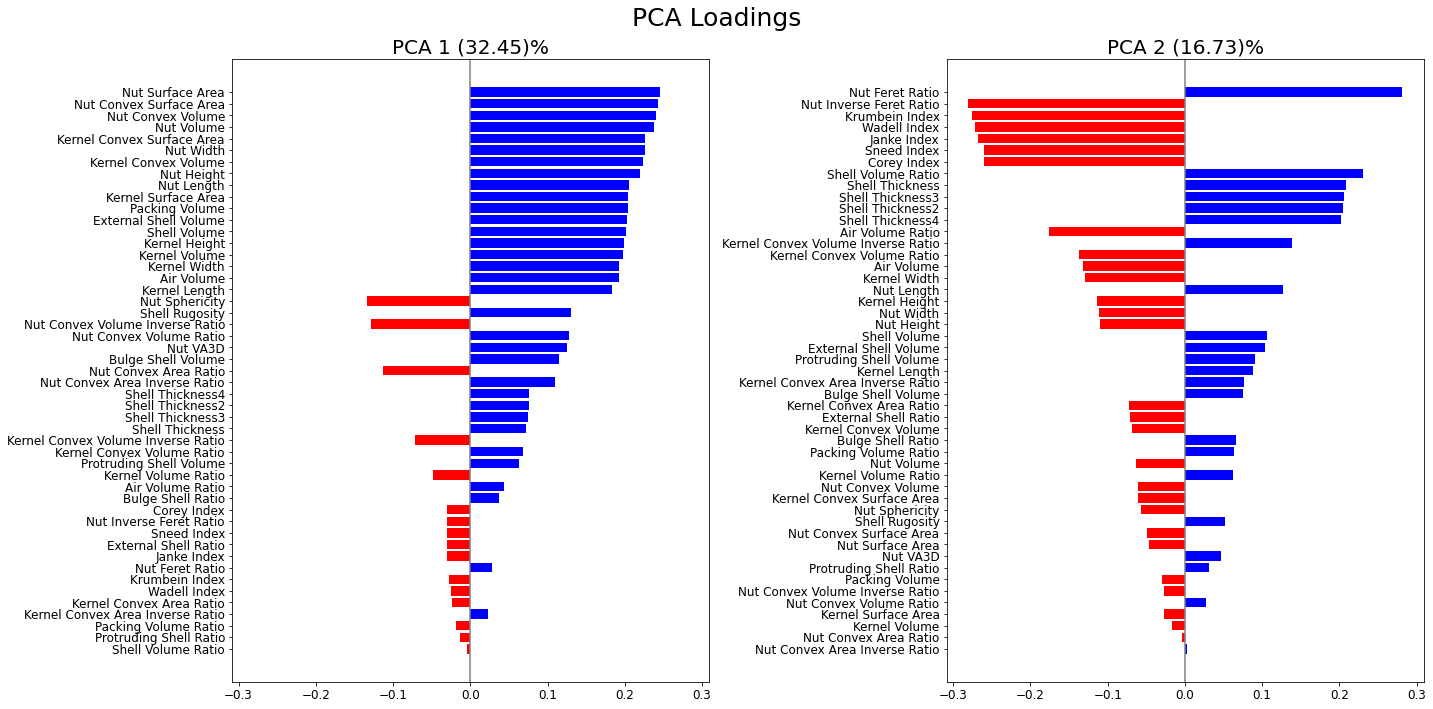

In [119]:
fs = 12
fig, ax = plt.subplots(1,2, figsize=(20,10), sharex=True, sharey=False)
ax = np.atleast_1d(ax).ravel()

idx = 0
#ax[idx].set_ylabel('PCA Loadings', fontsize=fs)

for idx in range(len(ax)):
    sortarr = np.argsort(np.abs(pca.components_[idx]))
    plus = np.where(pca.components_[idx][sortarr] > 0)[0]
    minus = np.where(pca.components_[idx][sortarr] < 0)[0]

    ax[idx].barh(plus, pca.components_[idx][sortarr][plus], color='b')
    ax[idx].barh(minus, pca.components_[idx][sortarr][minus], color='r')
    ax[idx].axvline(0, c='gray')
    ax[idx].set_yticks(range(len(pca.components_[idx])))
    ax[idx].set_yticklabels(scol_labels[sortarr+2]);
    ax[idx].tick_params('x', labelrotation=0, labelsize=fs);
    ax[idx].tick_params('y', labelsize=fs);
    ax[idx].set_title('PCA {} ({:.2f})%'.format(idx+1, pca.explained_variance_ratio_[idx]*100), fontsize=20)

fig.suptitle('PCA Loadings', fontsize=25)
fig.tight_layout();

filename = dst + 'PCA_loadings_h'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# KPCA

In [162]:
kpca = decomp.KernelPCA(n_components=2, 
                        kernel='rbf', 
                        gamma = 0.05, 
                        degree = 3,
                        coef0 = 1,
                        fit_inverse_transform=False, eigen_solver='dense')
kredux = kpca.fit_transform(imgfeats)
print(kredux.shape)

(1264, 2)


../../webpage/walnuts/figs/KPCA_rbf_trait_scatter


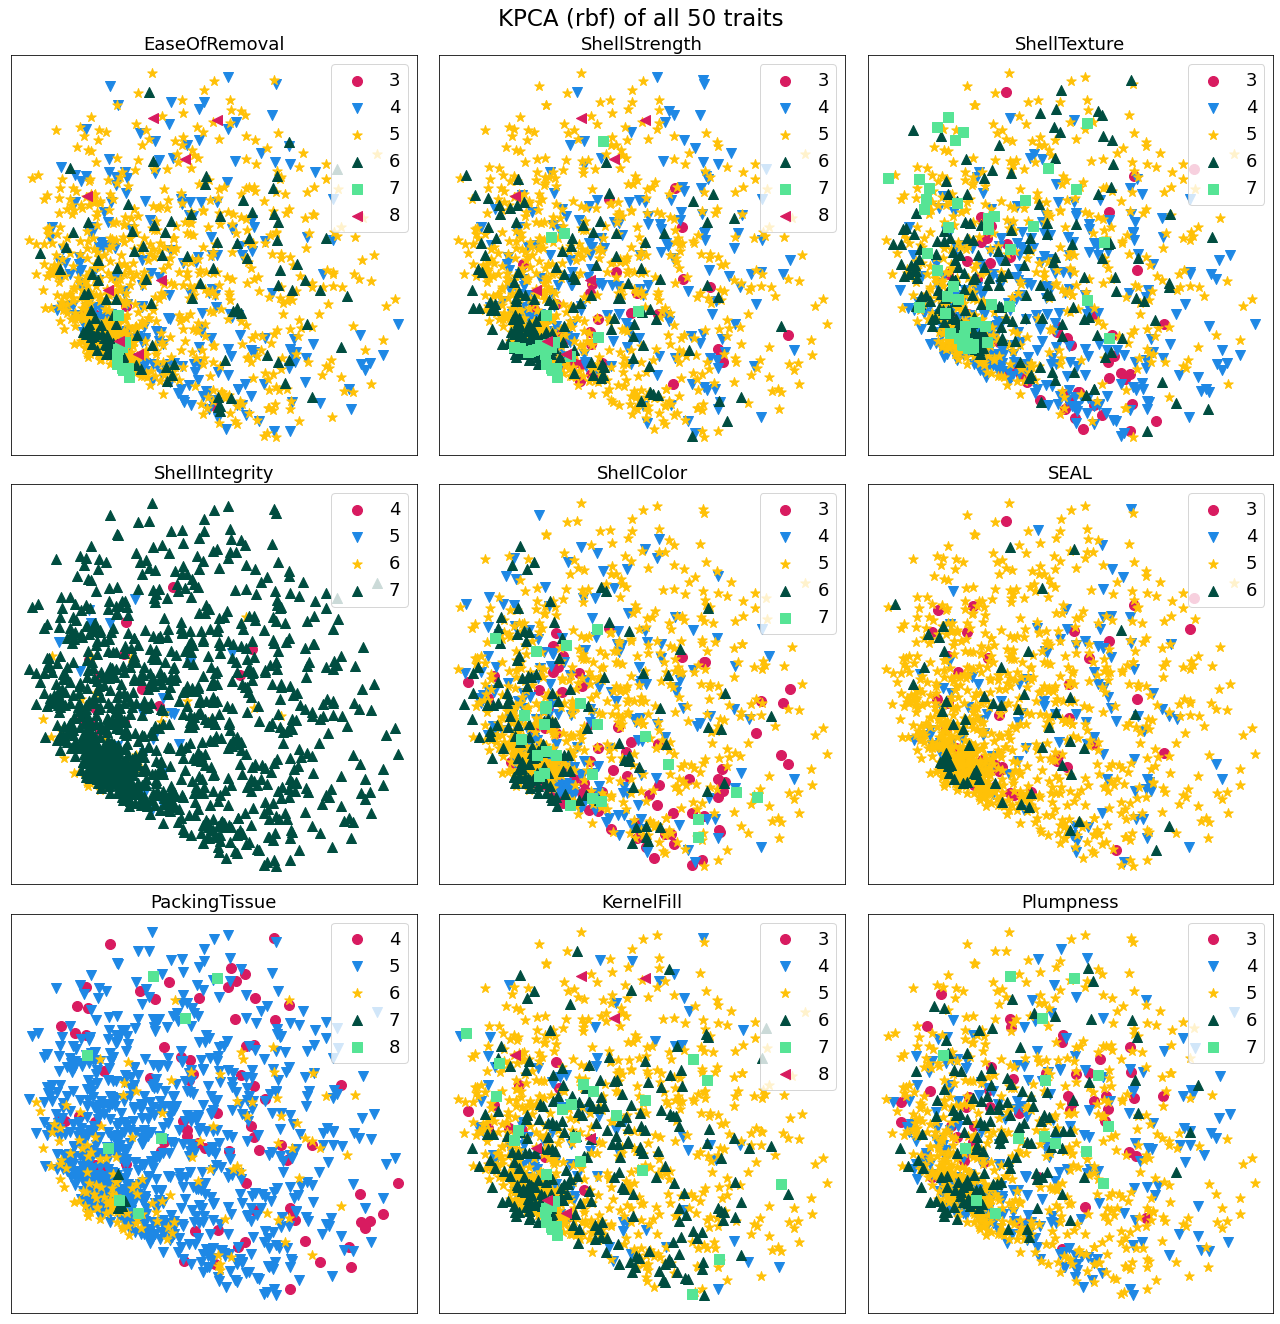

In [173]:
fs = 18
fig, ax = plt.subplots(3,3, figsize=(18,18.5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(kredux[mask,0],
                        kredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=100, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('KPCA (rbf) of all 50 traits', fontsize = fs+5, y=.99)
fig.tight_layout();

filename = dst + 'KPCA_rbf_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# Isomap

In [172]:
iso = mfold.Isomap(n_components=2, n_neighbors=16)
iredux = iso.fit_transform(imgfeats)
print(iredux.shape)

(1264, 2)


../../webpage/walnuts/figs/isomap_trait_scatter


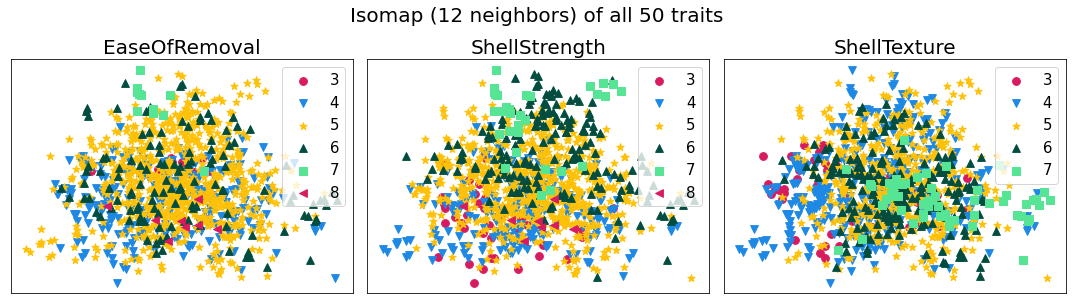

In [183]:
fs = 15
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(iredux[mask,0],
                        iredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=20);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('Isomap (12 neighbors) of all 50 traits', fontsize = fs+5, y=.93)
fig.tight_layout();

filename = dst + 'isomap_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# LLE

(1264, 2)
../../webpage/walnuts/figs/lle_trait_scatter


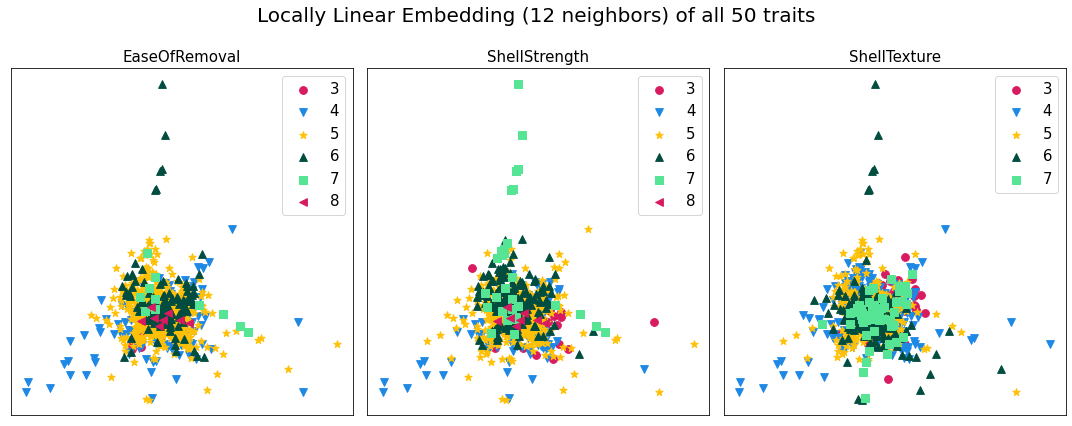

In [190]:
lle = mfold.LocallyLinearEmbedding(n_components=2, n_neighbors=12)
lredux = lle.fit_transform(imgfeats)
print(lredux.shape)

fs = 15
fig, ax = plt.subplots(1,3, figsize=(15,6.5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(lredux[mask,0],
                        lredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('Locally Linear Embedding (12 neighbors) of all 50 traits', fontsize = fs+5, y=.97)
fig.tight_layout();

filename = dst + 'lle_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# Spectral Embedding

(1264, 2)
../../webpage/walnuts/figs/se_trait_scatter


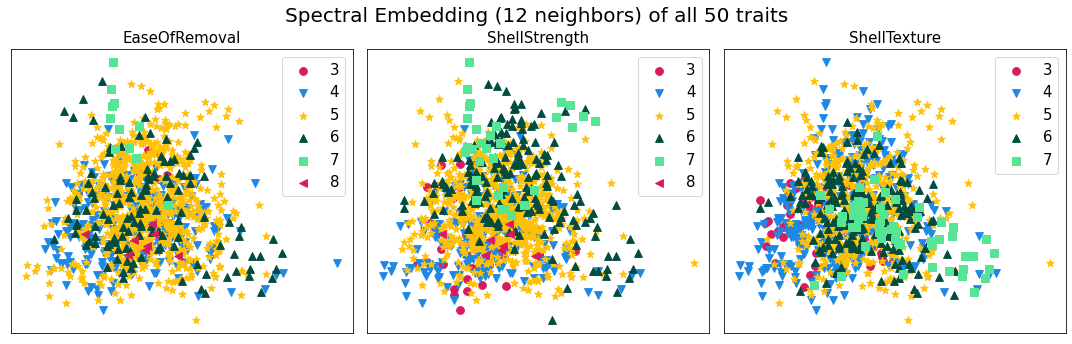

In [192]:
se = mfold.SpectralEmbedding(n_components=2,
                             affinity = 'rbf', #nearest_neighbors,
                             gamma = 0.005,
                             n_neighbors = 22)

sredux = se.fit_transform(imgfeats)
print(lredux.shape)

fs = 15
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(sredux[mask,0],
                        sredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('Spectral Embedding (12 neighbors) of all 50 traits', fontsize = fs+5, y=.97)
fig.tight_layout();

filename = dst + 'se_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# MDS

In [193]:
mds = mfold.MDS(n_components=2, metric=True,
                n_init = 10, dissimilarity='euclidean')

mredux = mds.fit_transform(imgfeats)

../../webpage/walnuts/figs/mds_trait_scatter


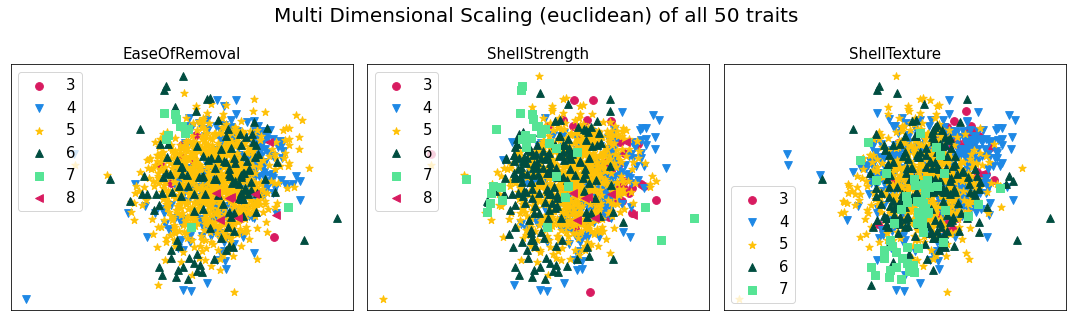

In [197]:
fs = 15
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(mredux[mask,0],
                        mredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('Multi Dimensional Scaling (euclidean) of all 50 traits', fontsize = fs+5, y=.96)
fig.tight_layout();

filename = dst + 'mds_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# t-SNE

In [198]:
tredux = mfold.TSNE(n_components=2, perplexity=12, early_exaggeration=20).fit_transform(imgfeats)

../../webpage/walnuts/figs/tsne_trait_scatter


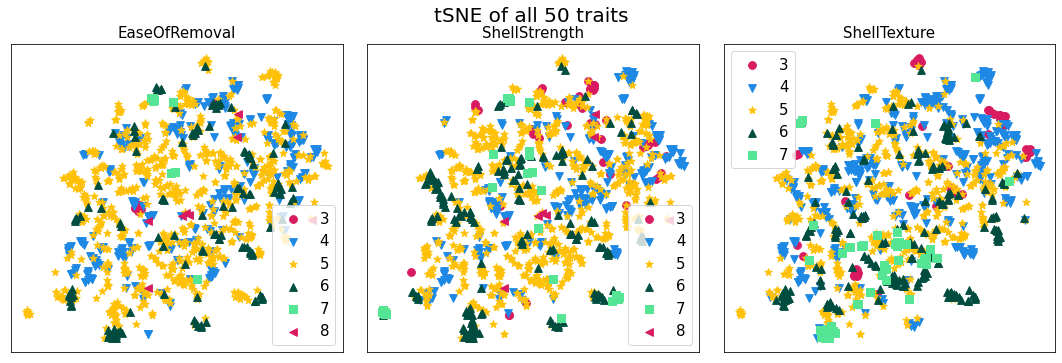

In [201]:
fs = 15
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(tredux[mask,0],
                        tredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('tSNE of all 50 traits', fontsize = fs+5, y=.99)
fig.tight_layout();

filename = dst + 'tsne_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})